In [83]:
# File operations
import glob as glob

# Visualizations
import sunpy.map
import matplotlib.pyplot as plt

# Essentials
import os
import pandas as pd

# Astrolibrary
from astropy.io import fits

# Spatial Libraries
import geopandas as gpd
from shapely.geometry import Polygon

import warnings
warnings.filterwarnings('ignore')

In [2]:
sharp_path = '/data/SHARPS/raw-sharps/'
mpil_path = '/data/MPIL/HMI_PIL/'

### Create a dataframe of MPILs

In [103]:
import os
import pandas as pd

# Set the path to the parent folder
parent_folder = mpil_path

# Create an empty dataframe to store the data
mpil_df = pd.DataFrame()

# Loop through each subfolder in the parent folder
for folder_name in os.listdir(parent_folder):
    
    # Check if the subfolder is a folder (not a file)
    if os.path.isdir(os.path.join(parent_folder, folder_name)):
        
        # Loop through each file in the subfolder
        for file_name in os.listdir(os.path.join(parent_folder, folder_name)):
            
            # Check if the file is a CSV file
            if file_name.endswith('.csv'):
                
                # Read the CSV file into a dataframe
                file_path = os.path.join(parent_folder, folder_name, file_name)
                temp_df = pd.read_csv(file_path, index_col=0, parse_dates=True)
                temp_df.dropna()
                temp_df=temp_df[temp_df['detection_flag'] == 'detected']
                
                # Add a new column to the dataframe with the folder name
                temp_df['harp_number'] = folder_name
                
                # Append the temporary dataframe to the main dataframe
                mpil_df = mpil_df.append(temp_df)

In [104]:
mpil_df

,num_PILs,sum_PIL_length,sum_RoPI_Area,sum_mag_field_strength,fra_dim,eige_vals,convexity,Hu1,Hu2,Hu3,Hu4,Hu5,Hu6,Hu7,patch_shape,detection_flag,harp_number
2011-05-16 07:00:00,1.0,16.0,55.0,4376.8,0.975489,"(4.8734186168345675, 8.651581383165432)",1.530330,0.792480,0.049008,0.182578,0.028420,-1.249026e-03,-2.402352e-03,1.622086e-03,"(50, 110)",detected,607
2011-05-16 07:12:00,1.0,26.0,75.0,6758.8,0.783170,"(32.88201603751013, 4.736445500951405)",1.685943,1.391215,1.083445,1.285498,0.409461,2.690108e-01,3.893052e-01,1.260233e-01,"(50, 110)",detected,607
2011-05-16 07:36:00,1.0,15.0,33.0,2291.6,0.408221,"(25.51190363902583, 0.2690487419265484)",1.871405,0.802074,0.616748,0.013637,0.003974,2.399184e-05,1.372794e-03,-1.673961e-05,"(50, 110)",detected,607
2011-05-16 11:00:00,1.0,14.0,32.0,1859.0,0.341504,"(17.507189408036506, 0.8334699326228326)",1.933648,1.216472,1.223037,0.392648,0.049254,-4.605914e-03,-4.900802e-02,-5.069700e-03,"(50, 110)",detected,607
2012-12-30 11:24:00,1.0,21.0,63.0,4506.0,0.616993,"(3.390789936759729, 10.69016244419265)",1.384337,0.638592,0.109586,0.009861,0.002241,5.655576e-06,6.826564e-04,8.891814e-06,"(112, 203)",detected,2340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-23 05:36:00,1.0,14.0,34.0,2521.7,0.503133,"(11.525084166649837, 2.881509239943567)",1.778535,0.191108,0.013147,0.003753,0.000587,-5.478554e-07,-4.885341e-05,-6.783228e-07,"(198, 395)",detected,5890
2015-08-23 05:48:00,1.0,16.0,48.0,4553.1,0.568303,"(15.585109400090193, 2.914890599909808)",1.780330,0.270996,0.034447,0.009147,0.002542,4.316145e-06,4.130618e-05,-1.147575e-05,"(198, 395)",detected,5890
2015-08-23 06:00:00,1.0,16.0,51.0,3942.7,0.568303,"(15.585472475965933, 2.5978608573674014)",1.780330,0.266357,0.036194,0.008752,0.002252,3.610717e-06,8.101749e-05,-9.324094e-06,"(198, 395)",detected,5890
2015-08-24 03:00:00,1.0,15.0,40.0,2284.7,0.569280,"(3.0825500474452725, 4.784116619221394)",1.193300,0.244741,0.002802,0.000624,0.000002,-6.150892e-11,7.828562e-08,1.682965e-11,"(198, 395)",detected,5890


Total number of sample images: 1247


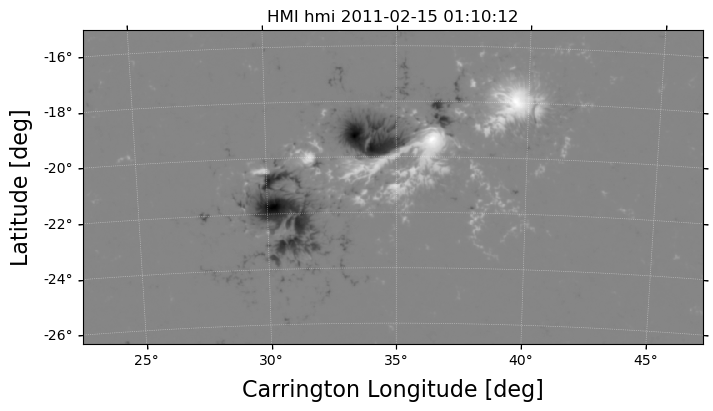

In [5]:
print('Total number of sample images: ' + str(len(sharps)))
hmi_magmap = sunpy.map.Map(sharps[998])

fig = plt.figure(figsize=(8,6))
hmi_magmap.plot()
plt.xlabel('Carrington Longitude [deg]',fontsize = 16)
plt.ylabel('Latitude [deg]',fontsize = 16)
plt.show()

### Create a dataframe of SHARP features: Timestamp, Min/Max Longitude and Latitude

In [ ]:
import os
import pandas as pd
from astropy.io import fits

# Set the path to the parent folder
parent_folder = sharp_path

# Define the list of features to extract from the FITS files
features = ['T_REC', 'LAT_MIN', 'LON_MIN', 'LAT_MAX', 'LON_MAX']
sharp_df = pd.DataFrame(columns=features)


# Loop through each subfolder in the parent folder
for folder_name in os.listdir(parent_folder):
    
    # Check if the subfolder is a folder (not a file)
    if os.path.isdir(os.path.join(parent_folder, folder_name)):
        
        # Loop through each file in the subfolder
        for file_name in os.listdir(os.path.join(parent_folder, folder_name)):
            
            # Check if the file is a FITS file
            if file_name.endswith('magnetogram.fits'):
                
                # Open the FITS file and extract the required features
                with fits.open(os.path.join(parent_folder, folder_name, file_name)) as hdul:

                    data = [hdul[1].header.get(feature) for feature in features]
                    
                    # Create a dictionary mapping the feature names to their extracted values
                    row = dict(zip(features, data))
                    
                    # Add the folder_name as a new feature
                    row['harp_num'] = folder_name
                    # Append the row to the list of dataframes
                    sharp_df = sharp_df.append(row, ignore_index=True)

In [138]:
mpil_df['T_REC'] = mpil_df.index
mpil_df['harp_num'] = mpil_df['harp_number']
mpil_df['T_REC'] = pd.to_datetime(mpil_df['T_REC'], format='%Y.%m.%d_%H:%M:%S_TAI')
mpil_df

,num_PILs,sum_PIL_length,sum_RoPI_Area,sum_mag_field_strength,fra_dim,eige_vals,convexity,Hu1,Hu2,Hu3,Hu4,Hu5,Hu6,Hu7,patch_shape,detection_flag,harp_number,TIMESTAMP,T_REC,harp_num
2011-05-16 07:00:00,1.0,16.0,55.0,4376.8,0.975489,"(4.8734186168345675, 8.651581383165432)",1.530330,0.792480,0.049008,0.182578,0.028420,-1.249026e-03,-2.402352e-03,1.622086e-03,"(50, 110)",detected,607,2011-05-16 07:00:00,2011-05-16 07:00:00,607
2011-05-16 07:12:00,1.0,26.0,75.0,6758.8,0.783170,"(32.88201603751013, 4.736445500951405)",1.685943,1.391215,1.083445,1.285498,0.409461,2.690108e-01,3.893052e-01,1.260233e-01,"(50, 110)",detected,607,2011-05-16 07:12:00,2011-05-16 07:12:00,607
2011-05-16 07:36:00,1.0,15.0,33.0,2291.6,0.408221,"(25.51190363902583, 0.2690487419265484)",1.871405,0.802074,0.616748,0.013637,0.003974,2.399184e-05,1.372794e-03,-1.673961e-05,"(50, 110)",detected,607,2011-05-16 07:36:00,2011-05-16 07:36:00,607
2011-05-16 11:00:00,1.0,14.0,32.0,1859.0,0.341504,"(17.507189408036506, 0.8334699326228326)",1.933648,1.216472,1.223037,0.392648,0.049254,-4.605914e-03,-4.900802e-02,-5.069700e-03,"(50, 110)",detected,607,2011-05-16 11:00:00,2011-05-16 11:00:00,607
2012-12-30 11:24:00,1.0,21.0,63.0,4506.0,0.616993,"(3.390789936759729, 10.69016244419265)",1.384337,0.638592,0.109586,0.009861,0.002241,5.655576e-06,6.826564e-04,8.891814e-06,"(112, 203)",detected,2340,2012-12-30 11:24:00,2012-12-30 11:24:00,2340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-23 05:36:00,1.0,14.0,34.0,2521.7,0.503133,"(11.525084166649837, 2.881509239943567)",1.778535,0.191108,0.013147,0.003753,0.000587,-5.478554e-07,-4.885341e-05,-6.783228e-07,"(198, 395)",detected,5890,2015-08-23 05:36:00,2015-08-23 05:36:00,5890
2015-08-23 05:48:00,1.0,16.0,48.0,4553.1,0.568303,"(15.585109400090193, 2.914890599909808)",1.780330,0.270996,0.034447,0.009147,0.002542,4.316145e-06,4.130618e-05,-1.147575e-05,"(198, 395)",detected,5890,2015-08-23 05:48:00,2015-08-23 05:48:00,5890
2015-08-23 06:00:00,1.0,16.0,51.0,3942.7,0.568303,"(15.585472475965933, 2.5978608573674014)",1.780330,0.266357,0.036194,0.008752,0.002252,3.610717e-06,8.101749e-05,-9.324094e-06,"(198, 395)",detected,5890,2015-08-23 06:00:00,2015-08-23 06:00:00,5890
2015-08-24 03:00:00,1.0,15.0,40.0,2284.7,0.569280,"(3.0825500474452725, 4.784116619221394)",1.193300,0.244741,0.002802,0.000624,0.000002,-6.150892e-11,7.828562e-08,1.682965e-11,"(198, 395)",detected,5890,2015-08-24 03:00:00,2015-08-24 03:00:00,5890


In [132]:
# Convert TAI to datetime,
sharp_df['T_REC'] = pd.to_datetime(sharp_df['T_REC'], format='%Y.%m.%d_%H:%M:%S_TAI')
sharp_df

,T_REC,LAT_MIN,LON_MIN,LAT_MAX,LON_MAX,harp_num
0,2014-09-21 16:12:00,16.596424,-19.586864,18.302673,-16.144773,4589
1,2014-09-21 10:36:00,16.760376,-22.640129,18.252762,-19.445099,4589
2,2014-09-20 19:48:00,15.820906,-30.602085,18.112684,-27.748159,4589
3,2014-09-20 15:00:00,15.713753,-33.071251,17.901888,-30.397882,4589
4,2014-09-20 13:24:00,15.750645,-33.944092,17.846416,-31.308847,4589
...,...,...,...,...,...,...
13362,2016-07-08 11:48:00,-10.922411,-14.013301,-8.736123,-11.285158,6663
13363,2016-07-08 22:48:00,-10.706678,-7.786942,-8.748113,-5.027003,6663
13364,2016-07-08 06:36:00,-10.98058,-16.932293,-9.047751,-14.292082,6663
13365,2016-07-08 00:12:00,-11.048514,-20.674597,-9.177757,-17.820341,6663


In [139]:
# set the datetime column as the index for the second dataframe
# sharp_df.set_index('T_REC', inplace=True) NO NEED TO DO THIS ANYMORE, BECAUSE TIME COLUMN IS NOT UNIQUE

# merge the two dataframes on their datetime index
mpil_ar = pd.merge(mpil_df, sharp_df, on=['T_REC', 'harp_num'])

In [141]:
mpil_ar
mpil_ar = mpil_ar.drop(columns=['harp_number', 'TIMESTAMP'])

### Final Version of Multimedia Converted into a Dataframe

In [150]:
mpil_ar

,num_PILs,sum_PIL_length,sum_RoPI_Area,sum_mag_field_strength,fra_dim,eige_vals,convexity,Hu1,Hu2,Hu3,...,Hu6,Hu7,patch_shape,detection_flag,T_REC,harp_num,LAT_MIN,LON_MIN,LAT_MAX,LON_MAX
0,9.0,331.0,876.0,71047.5,0.823245,"(45342.36912522299, 1398.5108344950731)",5.331382,4.454601,17.179896,228.745291,...,915.392693,0.341490,"(578, 1150)",detected,2011-04-15 04:00:00,504,5.329367,-66.168457,19.630384,-35.996304
1,9.0,334.0,892.0,70829.5,0.817765,"(44410.97281893281, 1441.302639160046)",5.288757,4.854904,20.154893,256.182823,...,1117.523247,-76.360815,"(578, 1150)",detected,2011-04-15 04:12:00,504,5.337533,-66.064896,19.636852,-35.884087
2,10.0,324.0,856.0,67474.0,0.821503,"(40429.8758167409, 1434.053883599292)",5.430915,4.158095,14.739065,92.693012,...,341.805393,-90.455767,"(578, 1150)",detected,2011-04-15 04:24:00,504,5.344217,-65.961128,19.634127,-35.77179
3,9.0,322.0,839.0,67328.1,0.799355,"(47180.6844190227, 1514.1959045005888)",5.492818,3.511085,10.516911,81.180474,...,254.098091,-20.987273,"(578, 1150)",detected,2011-04-15 04:36:00,504,5.343679,-65.844284,19.637663,-35.659031
4,10.0,335.0,864.0,67567.3,0.808084,"(42833.45257897485, 1512.127276240104)",5.259705,2.792608,6.589575,32.804658,...,80.579955,-0.792505,"(578, 1150)",detected,2011-04-15 04:48:00,504,5.340981,-65.751518,19.641911,-35.546242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397,1.0,20.0,69.0,6735.8,0.645285,"(0.347262509675204, 51.61063222716689)",1.369239,2.468000,5.929274,0.288431,...,0.512983,-0.000120,"(230, 529)",detected,2010-05-12 00:48:00,12,-22.958588,24.290592,-18.001263,35.997494
2398,1.0,20.0,73.0,6618.4,0.550419,"(50.13956926902944, 0.365693888865291)",1.236396,2.399000,5.589721,0.129296,...,0.195887,0.000290,"(230, 529)",detected,2010-05-12 01:00:00,12,-22.952137,24.416201,-17.996902,36.10527
2399,1.0,17.0,69.0,7002.7,0.533706,"(40.77715837238342, 0.33313574526364675)",1.288206,2.276002,5.013638,0.275572,...,0.181236,0.006846,"(230, 529)",detected,2010-05-12 01:12:00,12,-22.9415,24.537754,-17.993832,36.216484
2400,1.0,19.0,60.0,4867.5,0.601051,"(29.4922873004624, 1.4667770270229727)",1.960460,1.543665,1.952710,0.606937,...,-0.058711,0.013494,"(230, 529)",detected,2010-05-12 03:36:00,12,-22.894077,26.176367,-18.013342,37.380322


In [151]:
mpil_ar[mpil_ar['harp_num'] == '504']

,num_PILs,sum_PIL_length,sum_RoPI_Area,sum_mag_field_strength,fra_dim,eige_vals,convexity,Hu1,Hu2,Hu3,...,Hu6,Hu7,patch_shape,detection_flag,T_REC,harp_num,LAT_MIN,LON_MIN,LAT_MAX,LON_MAX
0,9.0,331.0,876.0,71047.5,0.823245,"(45342.36912522299, 1398.5108344950731)",5.331382,4.454601,17.179896,228.745291,...,915.392693,0.341490,"(578, 1150)",detected,2011-04-15 04:00:00,504,5.329367,-66.168457,19.630384,-35.996304
1,9.0,334.0,892.0,70829.5,0.817765,"(44410.97281893281, 1441.302639160046)",5.288757,4.854904,20.154893,256.182823,...,1117.523247,-76.360815,"(578, 1150)",detected,2011-04-15 04:12:00,504,5.337533,-66.064896,19.636852,-35.884087
2,10.0,324.0,856.0,67474.0,0.821503,"(40429.8758167409, 1434.053883599292)",5.430915,4.158095,14.739065,92.693012,...,341.805393,-90.455767,"(578, 1150)",detected,2011-04-15 04:24:00,504,5.344217,-65.961128,19.634127,-35.77179
3,9.0,322.0,839.0,67328.1,0.799355,"(47180.6844190227, 1514.1959045005888)",5.492818,3.511085,10.516911,81.180474,...,254.098091,-20.987273,"(578, 1150)",detected,2011-04-15 04:36:00,504,5.343679,-65.844284,19.637663,-35.659031
4,10.0,335.0,864.0,67567.3,0.808084,"(42833.45257897485, 1512.127276240104)",5.259705,2.792608,6.589575,32.804658,...,80.579955,-0.792505,"(578, 1150)",detected,2011-04-15 04:48:00,504,5.340981,-65.751518,19.641911,-35.546242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,6.0,195.0,530.0,42328.5,0.780092,"(7606.098283391406, 709.7297366984633)",2.928606,3.773822,8.672966,19.605566,...,-6.225989,21.349178,"(578, 1150)",detected,2011-04-22 18:12:00,504,6.167125,33.088493,21.557001,63.755978
881,10.0,231.0,661.0,59442.4,0.821100,"(8581.3937569153, 689.9123601560361)",2.687165,2.601828,4.967784,2.651310,...,-0.038172,0.635051,"(578, 1150)",detected,2011-04-22 18:24:00,504,6.189198,33.178955,21.559889,63.870113
882,7.0,185.0,546.0,54598.2,0.765719,"(7041.443250825111, 751.7295458846479)",3.064903,2.681740,4.665408,5.348027,...,0.292300,3.759009,"(578, 1150)",detected,2011-04-22 18:36:00,504,6.198965,33.293823,21.563118,63.973831
883,8.0,205.0,620.0,58269.2,0.787230,"(7874.487880787124, 633.6518609632391)",2.779829,3.222474,6.896974,5.125196,...,-1.548457,0.452410,"(578, 1150)",detected,2011-04-22 18:48:00,504,6.210166,33.408661,21.549911,64.086395


### Visualize polygons for active region 504

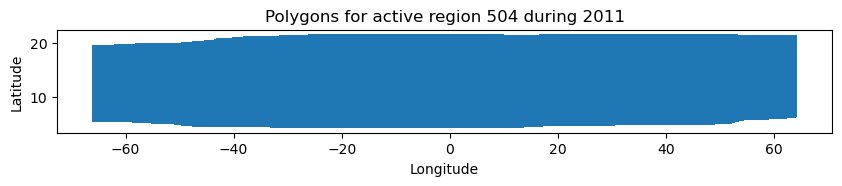

In [164]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

df_504 = mpil_ar[mpil_ar['harp_num'] == '504']

# Define a list of dates for which you want to create the polygons
dates = df_504['T_REC']

# set the date column as the index
df_504.set_index('T_REC', inplace=True)

# Create a list of polygon objects for each date
polygons = []
for date in dates:
    
    # Define the minimum and maximum longitude and latitude coordinates
    min_lon = df_504.loc[date, 'LON_MIN']
    max_lon = df_504.loc[date, 'LON_MAX']
    min_lat = df_504.loc[date, 'LAT_MIN']
    max_lat = df_504.loc[date, 'LAT_MAX']
    
    
    # Create a polygon object from the coordinates
    region_poly = Polygon([(min_lon, min_lat), (min_lon, max_lat), (max_lon, max_lat), (max_lon, min_lat)]) 
    
    # Append the polygon object to the list of polygons
    polygons.append(region_poly)

# Create a GeoDataFrame containing the polygons and dates as columns
poly_gdf = gpd.GeoDataFrame({'date': dates, 'geometry': polygons})

# Set the index of the GeoDataFrame to the date column
poly_gdf = poly_gdf.set_index('date')

# Plot the GeoDataFrame with a title and a figure size of (10, 10)
fig, ax = plt.subplots(figsize=(10, 10))
poly_gdf.plot(ax=ax)
ax.set_title("Polygons for active region 504 during 2011")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Display the plot
plt.show()

### 1. Distance-based clustering

In [166]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd

# Extract the minimum and maximum longitude and latitude of each polygon and store them in a separate DataFrame
polygons_df = pd.DataFrame()
polygons_df['min_longitude'] = mpil_ar['LON_MIN']
polygons_df['max_longitude'] = mpil_ar['LON_MAX']
polygons_df['min_latitude'] = mpil_ar['LAT_MIN']
polygons_df['max_latitude'] = mpil_ar['LAT_MAX']

# Scale the extracted values to the same range using MinMaxScaler
scaler = MinMaxScaler()
scaled_polygons_df = pd.DataFrame(scaler.fit_transform(polygons_df), columns=polygons_df.columns)

# Define the K-Means parameters and fit the model to the scaled data
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_polygons_df)

# Add the cluster labels to the GeoDataFrame
mpil_ar['cluster'] = kmeans.labels_

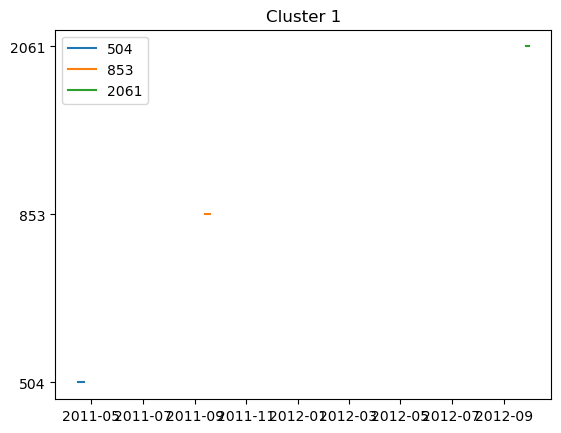

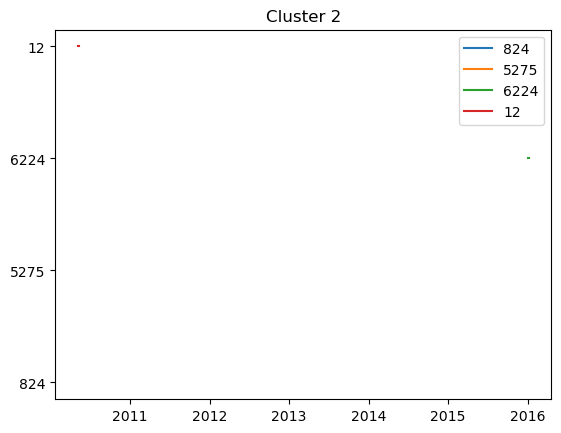

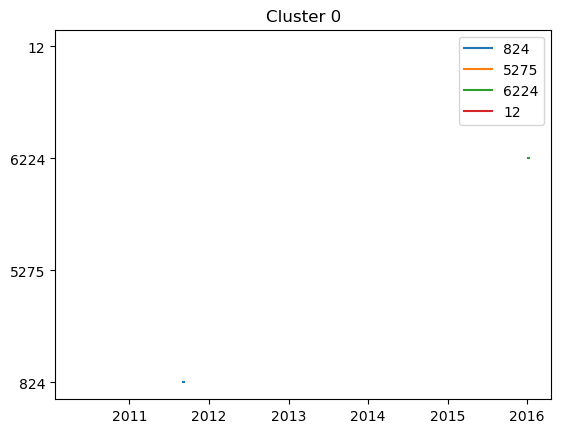

In [173]:
import matplotlib.pyplot as plt

# Iterate through each cluster and create a separate plot for each one
for cluster in mpil_ar['cluster'].unique():
    # Filter the GeoDataFrame to include only the time series in the current cluster
    cluster_gdf = mpil_ar[mpil_ar['cluster'] == cluster]
    
    # Iterate through each HARP number in the current cluster and plot its time series
    for harp_number in cluster_gdf['harp_num'].unique():
        # Filter the GeoDataFrame to include only the time series for the current HARP number
        harp_gdf = cluster_gdf[cluster_gdf['harp_num'] == harp_number]
        
        # Plot the time series using the 'feature_1' column as the x-axis and the 'feature_2' column as the y-axis
        plt.plot(harp_gdf['T_REC'], harp_gdf['harp_num'], label=harp_number)
        
    # Set the title and legend for the current plot
    plt.title('Cluster {}'.format(cluster))
    plt.legend()
    
    # Show the plot
    plt.show()

### 2. Density-based clustering (WIP)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances
from math import radians

# Define a function to calculate the haversine distance between two points in kilometers
def haversine(point1, point2):
    lat1, lon1 = point1
    lat2, lon2 = point2
    d_lat = radians(lat2 - lat1)
    d_lon = radians(lon2 - lon1)
    a = (pow(sin(d_lat / 2), 2) +
         cos(radians(lat1)) * cos(radians(lat2)) *
         pow(sin(d_lon / 2), 2))
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return c

# Load the time series data as a GeoDataFrame
time_series_gdf = gpd.read_file('time_series_data.geojson')

# Extract the HARP numbers as a list of integers
harp_numbers = time_series_gdf['harp_number'].astype(int).tolist()

# Calculate the pairwise distances between the HARP numbers as polygons using haversine_distances
coords = time_series_gdf['geometry'].apply(lambda x: (x.centroid.y, x.centroid.x)).tolist()
distances = haversine_distances([radians(c) for c in coords]) * 6371

# Define the DBSCAN parameters and fit the model to the distance matrix
dbscan = DBSCAN(eps=10, min_samples=3, metric='precomputed')
clusters = dbscan.fit_predict(distances)

# Add the cluster labels to the GeoDataFrame
time_series_gdf['cluster'] = clusters


### 3. Hierarchical clustering (Future Work)